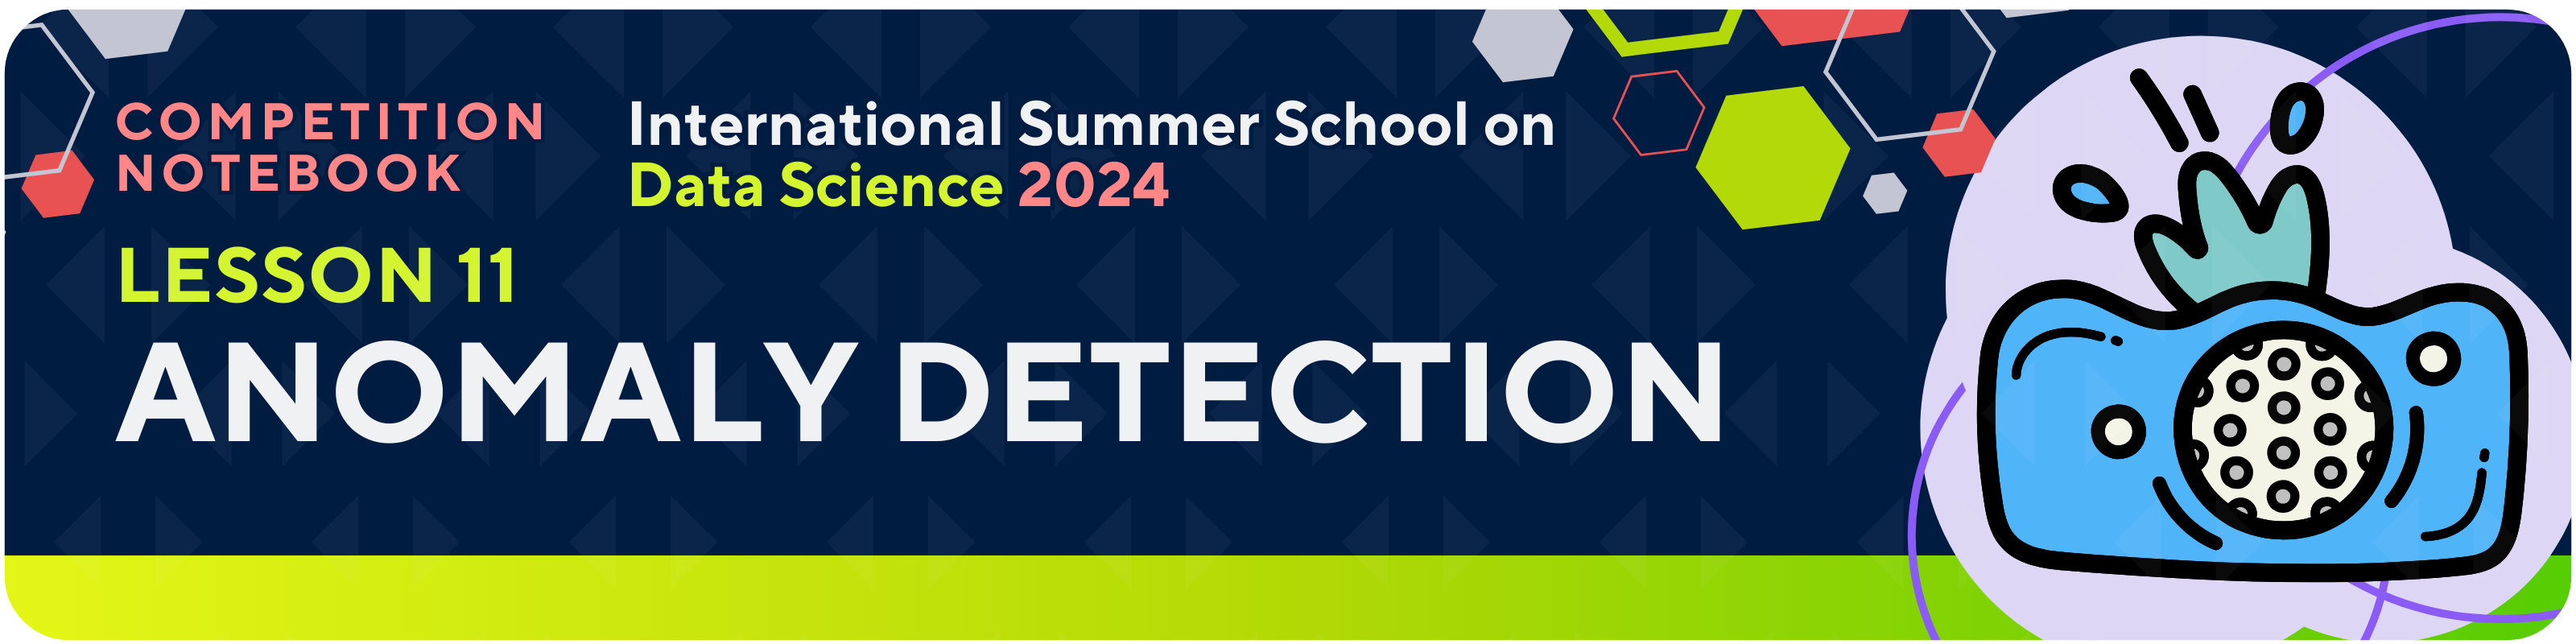


## **🎯      Goal**


Some of the golf players record has been manipulated, causing a fight among the golf club members! As a data scientist, you should try to find all the anomalies in the record!

<img src="https://i.imgur.com/eIiRfgn.png" width=1200 />


## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
!pip install umap-learn -q
!pip install pyod -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# BASIC LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PREPROCESSING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import silhouette_score

# DIMENSIONALITY REDUCTION
from umap                    import UMAP

# MODELING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy           import DummyClassifier

# ANOMALY DETECTION
from pyod.models.iforest import IForest

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load Training Dataset**



In [ ]:
# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/6mmh6yjf7l0n3k9pu0jmx/train_anomalydetection.csv?rlkey=cr68c1hsdf06hspmz9jdi6dm3&st=cbevku5u&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='MembershipID')

df_train

,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
MembershipID,,,,,,,,,,,,,,
AK39205,5.8,18.9,315.0,37.3,48.1,58.0,0,68.9,78,3.0,0.0,8.4,76.6,4.2
CY14365,5.2,12.5,244.8,29.8,76.1,55.1,1,50.0,43,3.9,6.8,3.4,62.6,3.4
PR52596,5.9,14.0,270.5,31.9,53.3,62.2,0,50.6,40,3.5,8.8,2.1,21.6,8.0
OK30685,6.7,32.6,159.2,39.8,54.3,67.9,1,80.2,41,9.3,10.5,9.3,56.7,8.3
JT59321,7.7,15.5,326.7,34.4,45.9,50.2,0,64.5,56,2.3,6.5,0.4,61.9,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KF85677,5.4,17.2,319.1,34.3,30.7,49.6,0,77.2,50,1.5,8.2,5.3,46.7,8.0
WG22942,17.0,5.4,281.9,28.5,94.7,93.9,1,66.1,45,4.5,8.3,7.1,55.6,7.1
BY75476,1.0,3.1,413.5,29.1,98.3,101.1,0,103.2,99,1.9,10.7,9.6,85.8,10.8



## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
# SET FEATURE MATRIX
target_col = 'Outlier'
X = df_train


## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore the Data**


In [ ]:
# Perform EDA here if you want.
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6647 entries, AK39205 to KD57518
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearsOfExperience     6647 non-null   float64
 1   HandicapIndex         6647 non-null   float64
 2   AvgDrivingDistance    6647 non-null   float64
 3   AveragePuttsPerRound  6647 non-null   float64
 4   DrivingAccuracy       6647 non-null   float64
 5   GreensInRegulation    6647 non-null   float64
 6   TournamentWins        6647 non-null   int64  
 7   PreferredTemperature  6647 non-null   float64
 8   PreferredHumidity     6647 non-null   int64  
 9   PreferredWindSpeed    6647 non-null   float64
 10  RainTolerance         6647 non-null   float64
 11  SunlightPreference    6647 non-null   float64
 12  PreferredCloudCover   6647 non-null   float64
 13  ExtremeTempComfort    6647 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 778.9+ KB
None



## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing**


In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

### Visualize Preprocessed Data

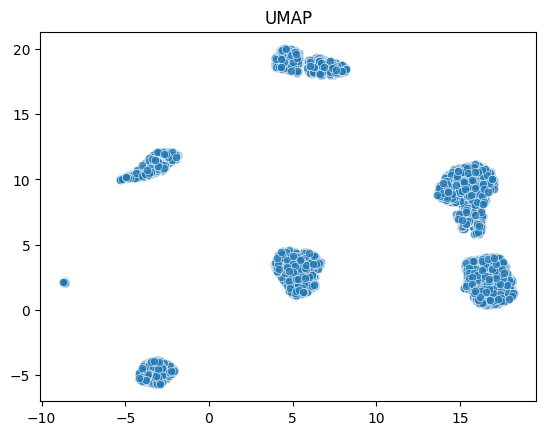

In [ ]:
# Reduce Dimension
dim_reducer = UMAP()
X_transformed = dim_reducer.fit_transform(X_processed)

# Visualize
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
            alpha=0.7, edgecolor='w', lw=0.5)
plt.title('UMAP')
plt.show()


## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Training Pipeline**



In [ ]:
from pyod.models.ocsvm import OCSVM
from sklearn.cluster import DBSCAN
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.auto_encoder import AutoEncoder
# MAKE A TRAINING PIPELINE
training_pipeline = Pipeline([
    ('anomaly_detector', LOF()) #Instead of LOF
])

training_pipeline


Pipeline(steps=[('anomaly_detector',
                 LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2))])


## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**



In [ ]:
# Define parameter distribution
from sklearn.metrics import calinski_harabasz_score
param_dist = {
    'anomaly_detector__n_neighbors': range(4, 50),  # A range of possible n_neighbors to evaluate
    'anomaly_detector__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms for nearest neighbor search
    'anomaly_detector__leaf_size': range(30, 100, 10),  # Varying sizes for the leaf parameter in tree-based algorithms
    'anomaly_detector__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],  # Different distance metrics to test
    'anomaly_detector__p': [1, 2],  # Testing both Euclidean and Manhattan distances
    'anomaly_detector__contamination': np.linspace(0.01, 0.2, 10)  # A range of contamination levels
}

# param_dist = { #This one is for the neural networks that can be tested later.
#     'anomaly_detector__hidden_neuron_list': [
#         [5, 2, 5], [10, 5, 10], [10, 2, 10]  # Encoder-decoder architecture
#     ],
#     'anomaly_detector__hidden_activation_name': ['relu', 'sigmoid', 'tanh'],
#     'anomaly_detector__optimizer_name': ['adam', 'sgd', 'rmsprop'],
#     'anomaly_detector__epoch_num': [50, 100, 150],  # Use epoch_num instead of epochs
#     'anomaly_detector__batch_size': [32, 64, 128],
#     'anomaly_detector__lr': [0.001, 0.01, 0.1]  # Adding learning rate as it is a common parameter to tune
# }

# Define scoring function
def anomaly_scorer(estimator, X):
    y_pred = estimator.predict(X)
    return silhouette_score(X, y_pred)



# Perform Random Search
random_search = RandomizedSearchCV(estimator=training_pipeline,
                                   param_distributions=param_dist,
                                   scoring=anomaly_scorer,
                                   cv=3, n_iter=2)


random_search.fit(X_transformed)

# Print best parameter and score
print("Best Parameters:")
print(pd.Series(random_search.best_params_))
print("\nBest  silhouette Score:")
print(f"{random_search.best_score_:.4}")

Best Parameters:
anomaly_detector__p                        1
anomaly_detector__n_neighbors             20
anomaly_detector__metric           euclidean
anomaly_detector__leaf_size               50
anomaly_detector__contamination         0.01
anomaly_detector__algorithm             auto
dtype: object

Best  silhouette Score:
0.08816



## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# Save & fit best model
best_model = random_search.best_estimator_
best_model.fit(X_processed)

Pipeline(steps=[('anomaly_detector',
                 LOF(algorithm='auto', contamination=0.01, leaf_size=50, metric='euclidean',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=1))])


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction**



In [ ]:
# Get the anomaly scores
anomaly_scores = best_model.predict_proba(X_processed)[:, 1]

# Print the anomaly scores
pd.Series(anomaly_scores)

,0
0,0.137318
1,0.107130
2,0.016316
3,0.176269
4,0.025813
...,...
6642,0.084967
6643,0.099642
6644,0.030472
6645,0.053915


### Visualize the Prediction

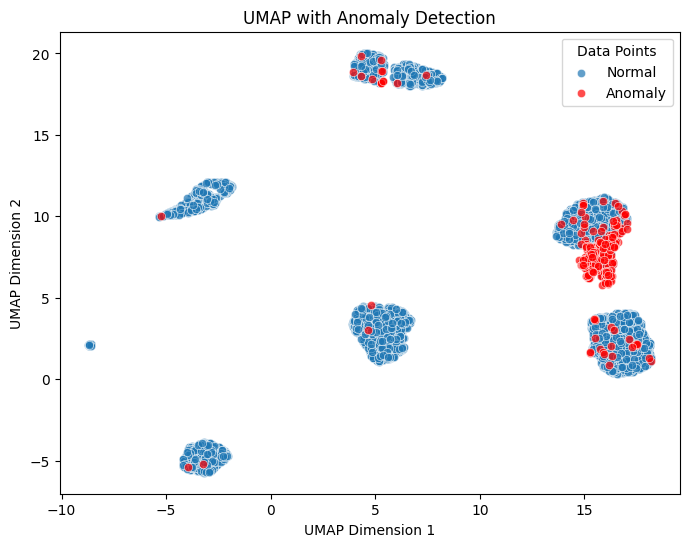

In [ ]:
# Set a threshold for anomaly classification
threshold = np.percentile(anomaly_scores, 95)  # Adjust the percentile as needed

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[anomaly_scores <= threshold, 0], X_transformed[anomaly_scores <= threshold, 1],
            label='Normal', alpha=0.7, edgecolor='w', lw=0.5)
plt.scatter(X_transformed[anomaly_scores > threshold, 0], X_transformed[anomaly_scores > threshold, 1],
            label='Anomaly', alpha=0.7, edgecolor='w', lw=0.5, c='r')
plt.title('UMAP with Anomaly Detection')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Data Points')
plt.show()


## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Make DataFrame for Submission
submission = pd.DataFrame(anomaly_scores, index=X.index, columns=['Outlier'])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Outlier
MembershipID,
AK39205,0.137318
CY14365,0.107130
PR52596,0.016316
OK30685,0.176269
JT59321,0.025813
...,...
KF85677,0.084967
WG22942,0.099642
BY75476,0.030472


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>